# Establishing a Baseline for the Problem

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline

Importing the required datasets

In [2]:
rice = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/Rice.csv")
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797


In [3]:
rice_haryana = rice[rice["State_Name"]=="Haryana"]
rice_haryana.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value
4210,Haryana,AMBALA,1997,Kharif,Rice,65000.0,182000.0,2.800000
4211,Haryana,AMBALA,1998,Kharif,Rice,71365.0,186000.0,2.606320
4212,Haryana,AMBALA,1999,Kharif,Rice,72185.0,206000.0,2.853778
4213,Haryana,AMBALA,2000,Kharif,Rice,71840.0,217000.0,3.020601
4214,Haryana,AMBALA,2001,Kharif,Rice,74881.0,233000.0,3.111604


In [4]:
rainfall = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/rainfall.csv")
rainfall.head()

,State,ind_district,Year,Value
0,Andhra Pradesh,Adilabad,1994,1199.447
1,Andhra Pradesh,Adilabad,1995,1255.561
2,Andhra Pradesh,Adilabad,1996,1081.171
3,Andhra Pradesh,Adilabad,1997,905.718
4,Andhra Pradesh,Adilabad,1998,1128.950


In [5]:
rain_haryana = rainfall[rainfall["State"]=="Haryana"]
print(rain_haryana.head())
print(rain_haryana.describe())

        State ind_district  Year    Value
1179  Haryana       Ambala  1994  620.808
1180  Haryana       Ambala  1995  832.320
1181  Haryana       Ambala  1996  784.208
1182  Haryana       Ambala  1997  784.650
1183  Haryana       Ambala  1998  649.086
              Year       Value
count   171.000000  171.000000
mean   1998.000000  531.810170
std       2.589572  165.230096
min    1994.000000  166.299000
25%    1996.000000  420.334500
50%    1998.000000  531.747000
75%    2000.000000  646.928500
max    2002.000000  895.146000


In [6]:
X_hr = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/haryana.csv")
X_hr.head()

,ind_district,Crop_Year,Y,X1,X2,X3,X4
0,AMBALA,1997,182000.0,NaN,NaN,784.650,784.208
1,AMBALA,1998,186000.0,182000.0,NaN,649.086,784.650
2,AMBALA,1999,206000.0,186000.0,182000.0,396.134,649.086
3,AMBALA,2000,217000.0,206000.0,186000.0,593.737,396.134
4,AMBALA,2001,233000.0,217000.0,206000.0,469.118,593.737


Cleaning and preparing the datasets

In [7]:
X_finite = X_hr[np.isfinite(X_hr["X1"])]
X_finite = X_finite[np.isfinite(X_finite["X2"])]
X_finite = X_finite[np.isfinite(X_finite["X3"])]
X_finite = X_finite[np.isfinite(X_finite["X4"])]
X_finite = X_finite[np.isfinite(X_finite["Y"])]
X_finite.head()

,ind_district,Crop_Year,Y,X1,X2,X3,X4
2,AMBALA,1999,206000.0,186000.0,182000.0,396.134,649.086
3,AMBALA,2000,217000.0,206000.0,186000.0,593.737,396.134
4,AMBALA,2001,233000.0,217000.0,206000.0,469.118,593.737
5,AMBALA,2002,183000.0,233000.0,217000.0,476.752,469.118
8,AMBALA,2005,254000.0,233000.0,227000.0,1058.400,1202.900


In [8]:
Xn = X_finite
Xn.describe()

,Crop_Year,Y,X1,X2,X3,X4
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,2004.204724,182771.653543,181007.874016,174322.834646,489.894449,502.577819
std,3.733883,147264.161147,147414.085609,142965.856835,211.255550,190.321342
min,1999.000000,3000.000000,2000.000000,2000.000000,126.300000,126.300000
25%,2001.000000,49000.000000,52500.000000,55500.000000,342.916000,362.211500
50%,2005.000000,166000.000000,164000.000000,160000.000000,458.600000,486.380000
75%,2007.000000,251500.000000,240500.000000,227000.000000,573.491500,605.301500
max,2010.000000,610000.000000,610000.000000,610000.000000,1433.900000,1227.900000


In [9]:
y = Xn["Y"]
X = Xn[["X1", "X2", "X3", "X4"]]

Text(0.5,1,'Distribution of the Rice Production Values')

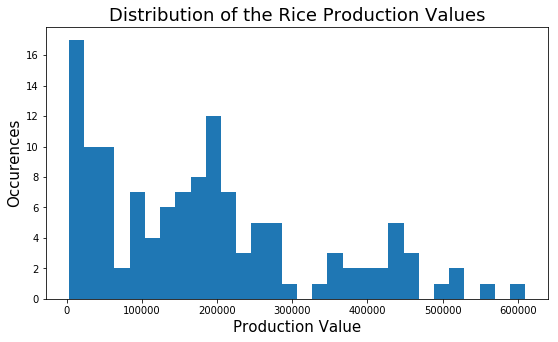

In [10]:
plt.figure(figsize=(9, 5))
plt.hist(y, bins=30)
plt.xlabel('Production Value',fontsize=15)
plt.ylabel('Occurences',fontsize=15)
plt.title('Distribution of the Rice Production Values',fontsize=18)

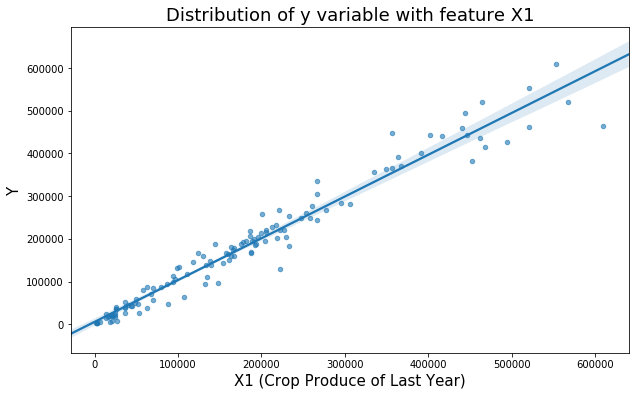

In [11]:
Xplot = Xn[["X1", "X2", "X3", "X4","Y"]]

var_name = "X1"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

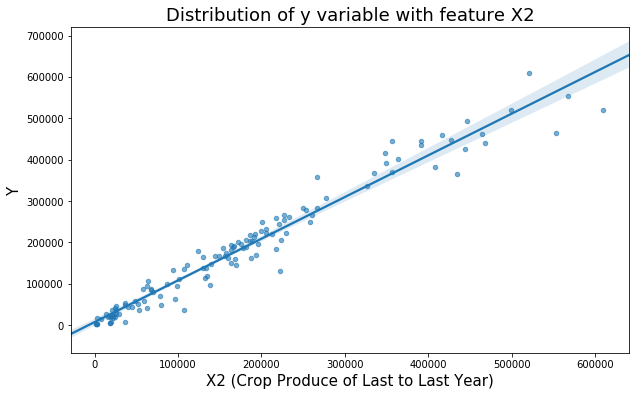

In [12]:
var_name = "X2"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last to Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

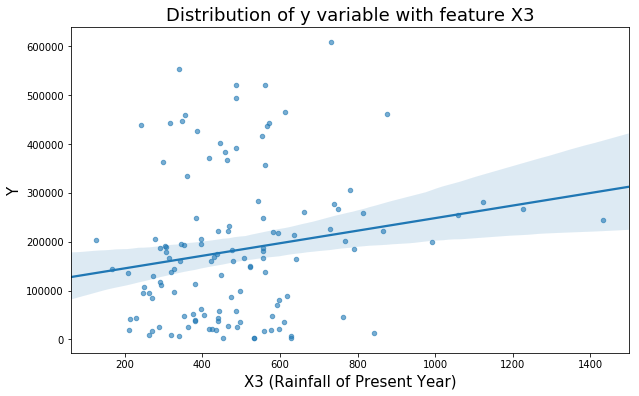

In [13]:
var_name = "X3"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Present Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

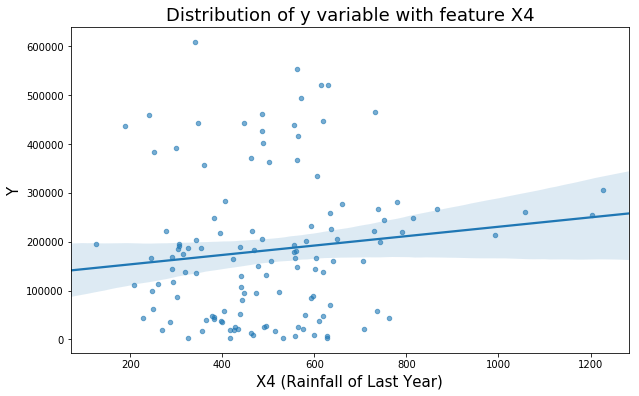

In [14]:
var_name = "X4"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

In [15]:
# Z-Score Normalization
cols = list(X.columns)

for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
X.head()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore
2,0.033999,0.053912,-0.445583,0.772842
3,0.170208,0.082001,0.493496,-0.561500
4,0.245124,0.222449,-0.098737,0.480872
5,0.354091,0.299695,-0.062458,-0.176503
8,0.354091,0.369919,2.701738,3.694256


Randomly splitting the dataset into training and testing sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

First baseline using Linear Regression 

In [18]:
alg = LinearRegression()
alg.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
coef = alg.coef_
coef = coef.round(decimals=2)
np.set_printoptions(suppress=True) #gem 
print("The coefficients for the linear regression model learnt are\n")
print(coef)
print()

The coefficients for the linear regression model learnt are

[ 73701.89  70350.8    2056.26    -55.16]



In [20]:
y_predict = alg.predict(X_test)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

23298.87377886106


## Lets calculate the average RMSE (Cross Validation, 5-Fold)

In [21]:
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')

In [22]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [23]:
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 16563.8011325   28901.49081778  43028.30003751  14194.87872337
  18528.23535214]


Avg RMSE is  24243.3412127


In [24]:
# print(type(y_test))
# print(type(y_predict))
yt = y_test.as_matrix()
print(type(yt))

<class 'numpy.ndarray'>


In [25]:
p = pd.DataFrame()
p["y_predicted"] = y_predict/1000
p["y_test"] = yt/1000

p["y_predicted"] = p["y_predicted"].round(decimals=1)
# p["y_test"] = p["y_test"].round(decimals=1)
p.describe()

,y_predicted,y_test
count,26.000000,26.000000
mean,196.711538,200.038462
std,111.520955,118.830124
min,19.500000,8.000000
25%,149.450000,153.250000
50%,183.000000,196.000000
75%,228.875000,251.750000
max,433.800000,460.000000


### Good enough results for the Haryana State

In [26]:
print(p)

    y_predicted  y_test
0         190.8   200.0
1         217.4   222.0
2         430.2   460.0
3          34.2     8.0
4         173.2   189.0
5         360.3   391.0
6         167.3   151.0
7         165.5   175.0
8         152.6   160.0
9         118.1    94.0
10         29.7    36.0
11        277.8   284.0
12        230.6   267.0
13        105.9    63.0
14        229.2   205.0
15        166.3   161.0
16        433.8   383.0
17        193.4   204.0
18        227.9   221.0
19        215.6   233.0
20        380.8   402.0
21        175.2   192.0
22        148.4   178.0
23        216.8   258.0
24         19.5    14.0
25         54.0    50.0


#### The Root Mean Square Error
It has the same unit as the data values.
With range of the test data set being [8,460], rmse as 23.3 is a decent one.

In [27]:
rmse/1000

23.29887377886106

# Constructing dataset for Whole India

### Preparing columns for the features, using rice production and rainfall datasets

In [28]:
rain1 = rainfall
rain2 = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/rainfall_distt_2004-10_nax.csv")

In [29]:
print(rice.describe())
print(rain1.describe())
print(rain2.describe())

          Crop_Year           Area    Production         Value
count  13169.000000   13169.000000  1.314700e+04  13169.000000
mean    2005.762397   50640.056200  1.057203e+05      1.942265
std        5.063566   71019.932027  1.759126e+05      2.144512
min     1997.000000       1.000000  0.000000e+00      0.000000
25%     2001.000000    3200.000000  4.966500e+03      1.258584
50%     2006.000000   19000.000000  2.944800e+04      1.894216
75%     2010.000000   73275.890000  1.319115e+05      2.494297
max     2015.000000  687000.000000  1.710000e+06    223.727273
              Year        Value
count  4878.000000  4878.000000
mean   1998.000000  1157.397511
std       2.582254   717.308841
min    1994.000000    55.502000
25%    1996.000000   743.227500
50%    1998.000000   971.803500
75%    2000.000000  1301.227500
max    2002.000000  9357.259000
              Year        Value
count  3006.000000  3006.000000
mean   2007.007651  1242.812309
std       2.031272   872.137946
min    2004.00000

In [30]:
a = np.empty((rice.shape[0],1))*np.NAN
rice = rice.assign(X1 = a)
rice = rice.assign(X2 = a)
rice = rice.assign(X3 = a)
rice = rice.assign(X4 = a)
rice.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458,NaN,NaN,NaN,NaN
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000,NaN,NaN,NaN,NaN
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038,NaN,NaN,NaN,NaN
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,NaN,NaN,NaN,NaN


Constructing the features X1 and X2, the production for the last 2 years.

In [31]:
l = rice.shape[0]
for row in range(0,l):
    if row-1<0 or rice.iloc[row,1] != rice.iloc[row-1,1]:
        continue
    else:
        rice.iloc[row,8] = rice.iloc[row-1,6]
        if row-2<0 or rice.iloc[row,1] != rice.iloc[row-2,1]:
            continue
        else:
            rice.iloc[row,9] = rice.iloc[row-2,6]

In [32]:
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458,321.00,NaN,NaN,NaN
2,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000,300.00,321.00,NaN,NaN
3,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038,510.84,300.00,NaN,NaN
4,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,90.17,510.84,NaN,NaN


In [33]:
def func(s):
    x = s.strip()
    return x.lower()

In [34]:
rice['ind_district'] = rice['ind_district'].apply(func)
rice['Season'] = rice['Season'].apply(func)
rain1['ind_district'] = rain1['ind_district'].apply(func)
rain2['ind_district'] = rain2['ind_district'].apply(func)
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
0,Andaman and Nicobar Islands,nicobars,2000,kharif,Rice,102.00,321.00,3.147059,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,nicobars,2001,kharif,Rice,83.00,300.00,3.614458,321.00,NaN,NaN,NaN
2,Andaman and Nicobar Islands,nicobars,2002,kharif,Rice,189.20,510.84,2.700000,300.00,321.00,NaN,NaN
3,Andaman and Nicobar Islands,nicobars,2003,kharif,Rice,52.00,90.17,1.734038,510.84,300.00,NaN,NaN
4,Andaman and Nicobar Islands,nicobars,2004,kharif,Rice,52.94,72.57,1.370797,90.17,510.84,NaN,NaN


In [35]:
rain1.head()

,State,ind_district,Year,Value
0,Andhra Pradesh,adilabad,1994,1199.447
1,Andhra Pradesh,adilabad,1995,1255.561
2,Andhra Pradesh,adilabad,1996,1081.171
3,Andhra Pradesh,adilabad,1997,905.718
4,Andhra Pradesh,adilabad,1998,1128.950


In [36]:
# can reduce the time by searching only one variable for some cases atleast
rice = rice[rice['Season'] == 'kharif']
l = rice.shape[0]

for row in range(0,l):
    
    dt = rice.iloc[row,1]
    yr = rice.iloc[row,2]
    
    if yr<=2002:
        
        # rainfall for the same year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr)]
        if r.shape[0] == 1:
            rice.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr-1)]
        if r.shape[0] == 1:
            rice.iloc[row,11] = r.iloc[0,3]
            
    if yr>2004:
        
        # rainfall for the same year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr)]
        if r.shape[0] == 1:
            rice.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr-1)]
        if r.shape[0] == 1:
            rice.iloc[row,11] = r.iloc[0,3]
        
    

In [37]:
# X1 = prod-1
# X2 = prod-2
# X3 = rain
# X4 = rain-1
rice.describe()

,Crop_Year,Area,Production,Value,X1,X2,X3,X4
count,5463.000000,5463.000000,5.449000e+03,5463.000000,5.090000e+03,4.809000e+03,2783.000000,2968.000000
mean,2005.394106,64076.532900,1.375553e+05,1.946222,1.047449e+05,1.309790e+05,1030.554382,1054.704046
std,4.949146,76112.336892,1.905742e+05,3.164509,1.821700e+05,1.918992e+05,623.505868,622.106761
min,1997.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,76.944000,118.200000
25%,2001.000000,7982.000000,1.006300e+04,1.212146,3.197750e+03,5.691000e+03,653.662000,677.295250
50%,2005.000000,32583.000000,5.785400e+04,1.852538,2.525150e+04,4.530000e+04,843.453000,883.950000
75%,2010.000000,101065.500000,2.059410e+05,2.483993,1.268458e+05,1.957000e+05,1190.236000,1197.745250
max,2015.000000,545965.000000,1.710000e+06,223.727273,1.710000e+06,1.710000e+06,4999.200000,5243.000000


In [38]:
ricex = rice[np.isfinite(rice["Production"])]
ricex = ricex[np.isfinite(ricex["X1"])]
ricex = ricex[np.isfinite(ricex["X2"])]
ricex = ricex[np.isfinite(ricex["X3"])]
ricex = ricex[np.isfinite(ricex["X4"])]
ricex.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,X3,X4
9,Andhra Pradesh,anantapur,1998,kharif,Rice,38300.0,96800.0,2.527415,37300.0,75400.0,881.473,797.051
11,Andhra Pradesh,anantapur,1999,kharif,Rice,37991.0,105082.0,2.765971,63900.0,96800.0,643.720,881.473
13,Andhra Pradesh,anantapur,2000,kharif,Rice,39905.0,117680.0,2.949004,45669.0,105082.0,767.351,643.720
15,Andhra Pradesh,anantapur,2001,kharif,Rice,32878.0,95609.0,2.907993,57236.0,117680.0,579.338,767.351
17,Andhra Pradesh,anantapur,2002,kharif,Rice,29066.0,66329.0,2.282013,108906.0,95609.0,540.070,579.338


In [39]:
X = ricex[["X1","X2","X3","X4"]]
y = ricex[["Production"]]

Text(0.5,1,'Distribution of the Rice Production Values')

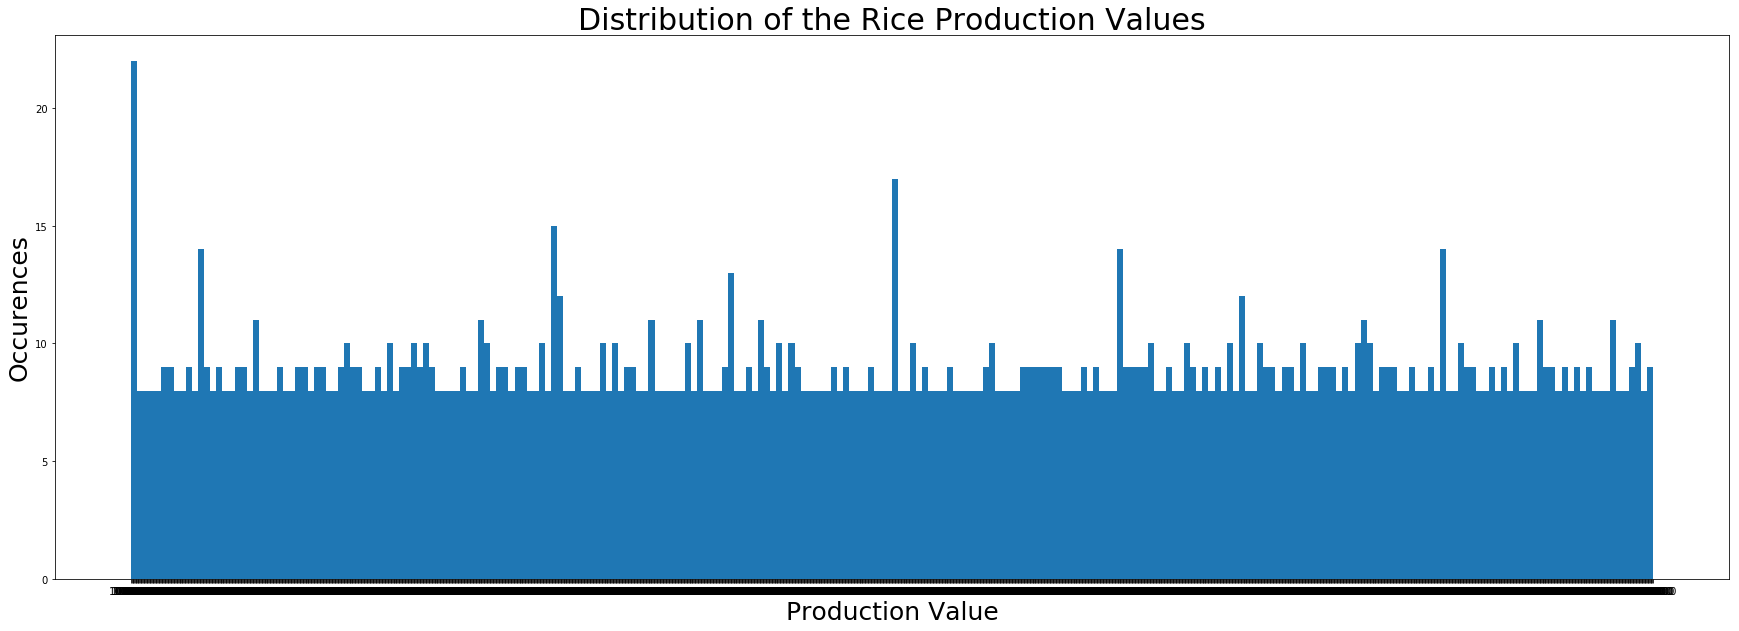

In [40]:
plt.figure(figsize=(30, 10))
plt.hist(y, bins=250)
plt.xlabel('Production Value',fontsize=25)
plt.ylabel('Occurences',fontsize=25)
plt.title('Distribution of the Rice Production Values',fontsize=30)

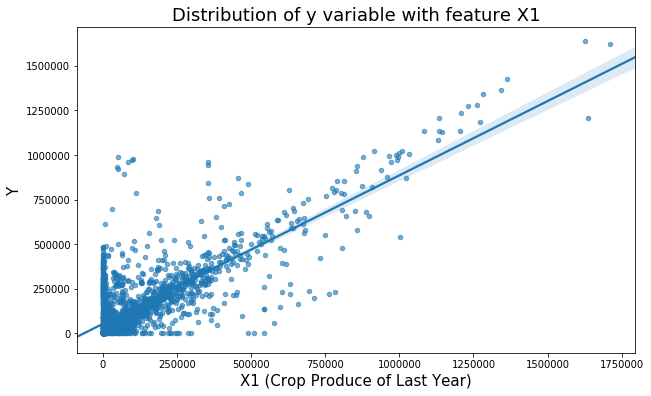

In [41]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X1"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

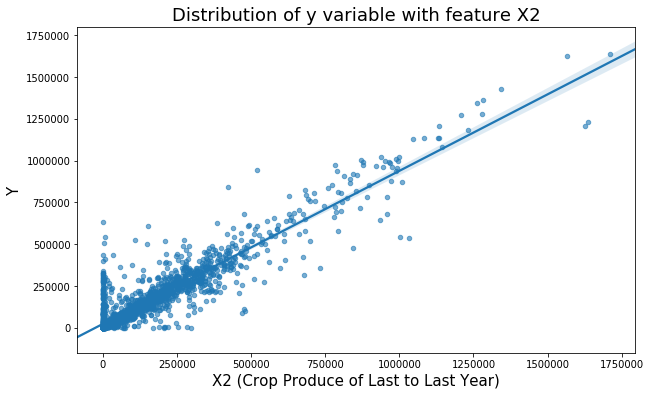

In [42]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X2"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last to Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

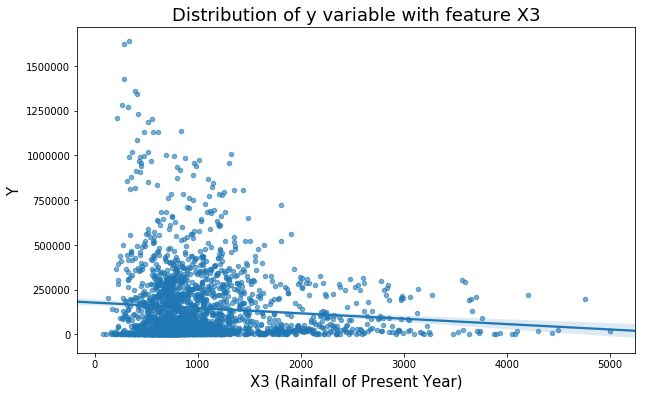

In [43]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X3"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Present Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

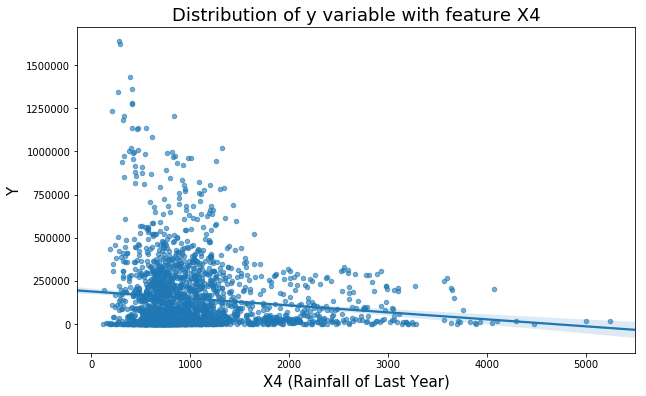

In [44]:
Xplot = ricex[["X1", "X2", "X3", "X4","Production"]]

var_name = "X4"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (Rainfall of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

In [45]:
# Z-Score Normalization

cols = list(X.columns)
for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]

In [47]:
X.head()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore
9,-0.390598,-0.291085,-0.241334,-0.394757
11,-0.255498,-0.187936,-0.611623,-0.261568
13,-0.348092,-0.148017,-0.419073,-0.636660
15,-0.289344,-0.087294,-0.711895,-0.441613
17,-0.026914,-0.193677,-0.773053,-0.738233


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [49]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
coef = alg.coef_
intercept = alg.intercept_

In [51]:
coef = coef.round(decimals=2)
pp = pprint.PrettyPrinter()
pp.pprint(coef)
pp.pprint(intercept)

array([[  38573.18,  158184.25,   18750.67,  -13781.87]])
array([ 145906.44863478])


In [52]:
y_predict = alg.predict(X_test)

In [53]:
yp = y_predict
yt = y_test.as_matrix()
type(y_predict)

numpy.ndarray

In [54]:
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

70628.2264795402


## Lets calculate the average RMSE (Cross Validation, 5-Fold)

In [55]:
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')

In [56]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [57]:
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 90696.68166565  61035.55459524  51367.37486568  95344.81806082
  74890.37880977]


Avg RMSE is  74666.9615994


In [58]:
yt = yt/1000
yp = yp/1000
yt = yt.round(decimals=1)
yp = yp.round(decimals=1)

In [59]:
yo = np.concatenate((yp,yt),axis=1)

In [60]:
p = pd.DataFrame(data=yo,columns=['Predicted','Actual'])
p.describe()

,Predicted,Actual
count,442.000000,442.000000
mean,138.243213,143.045928
std,191.785703,213.756353
min,2.600000,0.000000
25%,27.325000,6.200000
50%,62.950000,59.000000
75%,174.400000,191.175000
max,1255.300000,1362.000000


# Result
### This time the predictions are not as good as we got for just one state.

In [61]:
p

,Predicted,Actual
0,28.1,107.0
1,100.0,90.0
2,127.2,123.3
3,83.7,112.5
4,46.6,23.2
5,17.9,0.8
6,12.8,0.3
7,64.3,59.0
8,66.3,3.2
9,157.0,214.1


### The range of the values is (0,1362) and rmse is 70.6
We can say the results are decent but not good enough as we got with just one state.

In [62]:
rmse/1000

70.6282264795402

# Adding a new feature
### Quantity of Phosphorous in soil (low, medium, high)

This feaure is missing for some states in India, so little less number of samples

In [63]:
# loading the dataset
ricep = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/rice with soil(P).csv")

# Removing the rows with missing value of phosphorus
ricep = ricep[np.isfinite(ricep["phosphorus"])]

In [64]:
# Adding collumns for the other 4 features
a = np.empty((ricep.shape[0],1))*np.NAN
ricep = ricep.assign(X1 = a)
ricep = ricep.assign(X2 = a)
ricep = ricep.assign(X3 = a)
ricep = ricep.assign(X4 = a)
ricep.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,phosphorus,X1,X2,X3,X4
13,Andhra Pradesh,ANANTAPUR,1997,Kharif,Rice,35600.0,75400.0,-1.0,NaN,NaN,NaN,NaN
14,Andhra Pradesh,ANANTAPUR,1998,Kharif,Rice,38300.0,96800.0,-1.0,NaN,NaN,NaN,NaN
15,Andhra Pradesh,ANANTAPUR,1999,Kharif,Rice,37991.0,105082.0,-1.0,NaN,NaN,NaN,NaN
16,Andhra Pradesh,ANANTAPUR,2000,Kharif,Rice,39905.0,117680.0,-1.0,NaN,NaN,NaN,NaN
17,Andhra Pradesh,ANANTAPUR,2001,Kharif,Rice,32878.0,95609.0,-1.0,NaN,NaN,NaN,NaN


In [65]:
# Constructing features X1 and X2
l = ricep.shape[0]
for row in range(0,l):
    if row-1<0 or ricep.iloc[row,1] != ricep.iloc[row-1,1]:
        continue
    else:
        ricep.iloc[row,8] = ricep.iloc[row-1,6]
        if row-2<0 or ricep.iloc[row,1] != ricep.iloc[row-2,1]:
            continue
        else:
            ricep.iloc[row,9] = ricep.iloc[row-2,6]

In [66]:
# Making the strings in the dataset uniform, with other datasets
ricep['ind_district'] = ricep['ind_district'].apply(func)
ricep['Season'] = ricep['Season'].apply(func)

In [67]:
# Constructing features X3 and X4
l = ricep.shape[0]

for row in range(0,l):
    
    dt = ricep.iloc[row,1]
    yr = ricep.iloc[row,2]
    
    if yr<=2002:
        
        # rainfall for the same year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr)]
        if r.shape[0] == 1:
            ricep.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain1.loc[(rain1.ind_district == dt) & (rain1.Year == yr-1)]
        if r.shape[0] == 1:
            ricep.iloc[row,11] = r.iloc[0,3]
            
    if yr>2004:
        
        # rainfall for the same year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr)]
        if r.shape[0] == 1:
            ricep.iloc[row,10] = r.iloc[0,3]
            
        # rainfall for the previous year
        r = rain2.loc[(rain2.ind_district == dt) & (rain2.Year == yr-1)]
        if r.shape[0] == 1:
            ricep.iloc[row,11] = r.iloc[0,3]

In [68]:
# Removing rows with any missing values
ricep = ricep[np.isfinite(ricep["Production"])]
ricep = ricep[np.isfinite(ricep["X1"])]
ricep = ricep[np.isfinite(ricep["X2"])]
ricep = ricep[np.isfinite(ricep["X3"])]
ricep = ricep[np.isfinite(ricep["X4"])]
ricep.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,phosphorus,X1,X2,X3,X4
15,Andhra Pradesh,anantapur,1999,kharif,Rice,37991.0,105082.0,-1.0,96800.0,75400.0,643.720,881.473
16,Andhra Pradesh,anantapur,2000,kharif,Rice,39905.0,117680.0,-1.0,105082.0,96800.0,767.351,643.720
17,Andhra Pradesh,anantapur,2001,kharif,Rice,32878.0,95609.0,-1.0,117680.0,105082.0,579.338,767.351
18,Andhra Pradesh,anantapur,2002,kharif,Rice,29066.0,66329.0,-1.0,95609.0,117680.0,540.070,579.338
21,Andhra Pradesh,anantapur,2005,kharif,Rice,25008.0,69972.0,-1.0,85051.0,44891.0,819.700,564.500


In [69]:
ricep['phosphorus'] = ricep['phosphorus'] + 1
ricep.describe()

,Crop_Year,Area,Production,phosphorus,X1,X2,X3,X4
count,1931.000000,1931.000000,1.931000e+03,1931.000000,1.931000e+03,1.931000e+03,1931.000000,1931.000000
mean,2004.201968,69936.771103,1.556052e+05,0.557224,1.588625e+05,1.567246e+05,861.667570,871.507723
std,3.631699,81619.498004,2.151250e+05,0.665363,2.176855e+05,2.170873e+05,476.198957,458.603987
min,1999.000000,1.000000,0.000000e+00,0.000000,1.000000e+00,1.000000e+00,76.944000,108.800000
25%,2001.000000,6392.500000,6.326000e+03,0.000000,7.545500e+03,6.987500e+03,592.700000,607.830000
50%,2005.000000,41040.000000,7.190000e+04,0.000000,7.574800e+04,7.204800e+04,765.714000,773.600000
75%,2007.000000,111052.000000,2.333050e+05,1.000000,2.372640e+05,2.285185e+05,1023.702000,1045.679500
max,2010.000000,545965.000000,1.637000e+06,2.000000,1.710000e+06,1.710000e+06,4755.700000,4076.200000


In [70]:
X = ricep[["X1","X2","X3","X4","phosphorus"]]
y = ricep[["Production"]]

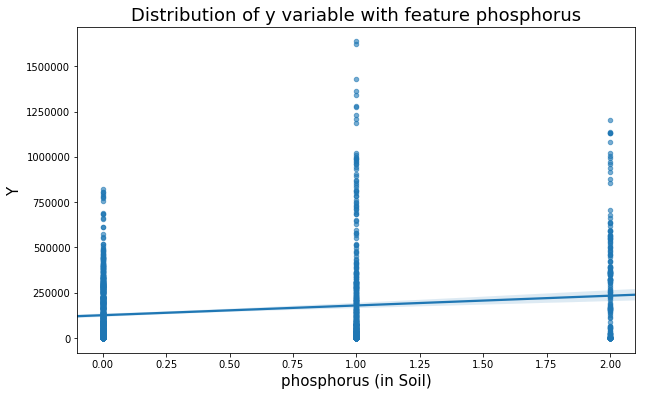

In [71]:
Xplot = ricep[["X1", "X2", "X3", "X4", "phosphorus", "Production"]]

var_name = "phosphorus"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Production', data=Xplot, scatter_kws={'alpha':0.6, 's':20})
plt.xlabel(var_name + " (in Soil)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)
plt.show()

In [72]:
# Z-Score Normalization

cols = list(X.columns)
for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore", "phosphorus_zscore"]]
X.head()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore,phosphorus_zscore
15,-0.285176,-0.374714,-0.457800,0.021735,-0.837691
16,-0.247120,-0.276111,-0.198113,-0.496827,-0.837691
17,-0.189232,-0.237950,-0.593035,-0.227176,-0.837691
18,-0.290648,-0.179903,-0.675518,-0.637250,-0.837691
21,-0.339162,-0.515288,-0.088153,-0.669613,-0.837691


In [74]:
X.describe()

,X1_zscore,X2_zscore,X3_zscore,X4_zscore,phosphorus_zscore
count,1.931000e+03,1.931000e+03,1.931000e+03,1.931000e+03,1.931000e+03
mean,1.471865e-17,2.943730e-17,1.582255e-16,2.023814e-16,5.887459e-17
std,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00,1.000259e+00
min,-7.299643e-01,-7.221251e-01,-1.648317e+00,-1.663538e+00,-8.376908e-01
25%,-6.952976e-01,-6.899339e-01,-5.649681e-01,-5.751063e-01,-8.376908e-01
50%,-3.819089e-01,-3.901588e-01,-2.015511e-01,-2.135461e-01,-8.376908e-01
75%,3.602528e-01,3.308001e-01,3.403544e-01,3.798853e-01,6.656372e-01
max,7.127436e+00,7.156926e+00,8.179441e+00,6.989739e+00,2.168965e+00


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [76]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [77]:
coef = alg.coef_
intercept = alg.intercept_

In [78]:
coef = coef.round(decimals=2)
pp = pprint.PrettyPrinter()
pp.pprint(coef)
pp.pprint(intercept)

array([[ 132506.04,   80946.49,    7100.73,   -7645.37,    -628.54]])
array([ 156958.37262622])


In [79]:
y_predict = alg.predict(X_test)

In [80]:
yp = y_predict
yt = y_test.as_matrix()
type(y_predict)

numpy.ndarray

In [81]:
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

54248.31068781849


#### Lets calculate the average RMSE (Cross Validation, 5-Fold)

In [82]:
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')

In [83]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [84]:
print(scores)
avg_rmse_phos = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 76204.91294612  27552.79356665  63041.13041068  55146.78083903
  39417.41847221]


Avg RMSE is  52272.6072469


In [85]:
yt = yt/1000
yp = yp/1000
yt = yt.round(decimals=1)
yp = yp.round(decimals=1)

In [86]:
yo = np.concatenate((yp,yt),axis=1)

In [87]:
p = pd.DataFrame(data=yo,columns=['Predicted','Actual'])
p.describe()

,Predicted,Actual
count,387.000000,387.000000
mean,149.640052,142.889406
std,201.643917,189.788422
min,-5.600000,0.000000
25%,14.600000,9.650000
50%,72.600000,71.300000
75%,227.450000,221.750000
max,1630.500000,1637.000000


In [88]:
p

,Predicted,Actual
0,171.7,190.6
1,52.0,56.1
2,263.1,223.5
3,8.9,14.5
4,81.3,37.0
5,90.4,14.2
6,190.0,204.0
7,211.5,255.0
8,53.8,67.3
9,172.9,220.2


In [89]:
rmse/1000

54.24831068781849

# Now lets compare with other feature combinations

In [90]:
# Just the 4 original features (no soil data)
X_old = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]

In [91]:
# Seed is fixed, so the vector y_test is going to same as before
X_train, X_test, y_train, y_test = train_test_split(X_old, y, test_size=0.2, random_state=1)

In [92]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
coef = alg.coef_
intercept = alg.intercept_

In [94]:
coef = coef.round(decimals=2)
pp = pprint.PrettyPrinter()
pp.pprint(coef)
pp.pprint(intercept)

array([[ 132450.58,   80889.02,    7144.62,   -7681.96]])
array([ 156944.0755844])


In [95]:
y_predict = alg.predict(X_test)
yp = y_predict
yt = y_test.as_matrix()
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

54259.34353018352


#### Average RMSE (Cross Validation, 5-Fold)

In [96]:
clf = LinearRegression()
scores = cross_val_score(clf, X_old, y, cv=5, scoring='neg_mean_squared_error')

In [97]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [98]:
print(scores)
avg_rmse_orig = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 76204.73868727  27581.31938911  61253.46984196  54898.98784947
  39436.16221218]


Avg RMSE is  51874.935596


 Avg RMSE with original 4 features  :  51874.9                                               
Avg RMSE with 5 features(soil too) : 52272.6

#### So there was NO improvement in the RMSE, due to the new feature.
## Now lets try by removing the rainfall features

In [99]:
X_no_rain = X[["X1_zscore", "X2_zscore"]]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_no_rain, y, test_size=0.2, random_state=1)

In [101]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
coef = alg.coef_
intercept = alg.intercept_

In [103]:
coef = coef.round(decimals=2)
pp = pprint.PrettyPrinter()
pp.pprint(coef)
pp.pprint(intercept)

array([[ 131375.8 ,   82072.26]])
array([ 157003.90363578])


In [104]:
y_predict = alg.predict(X_test)
yp = y_predict
yt = y_test.as_matrix()
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

54408.104038638914


#### Avg RMSE

In [105]:
clf = LinearRegression()
scores = cross_val_score(clf, X_no_rain, y, cv=5, scoring='neg_mean_squared_error')

In [106]:
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

In [107]:
print(scores)
avg_rmse_no_rain = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 76443.90121968  27973.46173293  60887.42884253  54851.03966512
  39454.09118802]


Avg RMSE is  51921.9845297


#### Avg RMSE with the original 4 features : 51874.9
#### Avg RMSE without the 2  rain features : 51921.9

# Ridge Regression

In [108]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=[1,2,3,4,5,6,7,7.1,7.2,7.3,8,9,10])
reg.fit(X_old, y)
reg.alpha_

7.0999999999999996

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_old, y, test_size=0.2, random_state=1)

reg = linear_model.Ridge(alpha = 7.1)
reg.fit (X_train, y_train)
print(reg.coef_)

[[ 129388.47233661   83479.38823733    6873.59978818   -7434.09039496]]


In [110]:
y_predict = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

54181.93424418657


#### Avg RMSE

In [111]:
clf = linear_model.Ridge(alpha = 7.1)
scores = cross_val_score(clf, X_old, y, cv=5, scoring='neg_mean_squared_error')

for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse_ridge = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 76134.52790453  27507.68332601  61457.10987059  54957.99018935
  39147.52019336]


Avg RMSE is  51840.9662968


#### Avg RMSE with Linear Regression : 51874.9
#### Avg RMSE with Ridge Regression : 51840.9
### So Ridge is slightly better than Linear

# Lasso Regression

In [112]:
from sklearn import linear_model

reg = linear_model.LassoCV(alphas=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1])
reg.fit(X_old, y)
reg.alpha_

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_old, y, test_size=0.2, random_state=1)

las = linear_model.Lasso(alpha = 0.01)
las.fit (X_train, y_train)
print(las.coef_)

[ 132450.83956189   80888.75823956    7144.57227528   -7681.91765549]


In [114]:
y_predict = las.predict(X_test)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

54259.33551624823


#### Avg RMSE

In [115]:
clf = linear_model.Lasso(alpha = 0.01)
scores = cross_val_score(clf, X_old, y, cv=5, scoring='neg_mean_squared_error')

for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse_las = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 76204.74665396  27581.32715608  61253.46437277  54898.96269897
  39436.18029115]


Avg RMSE is  51874.9362346


#### Avg RMSE with Linear Regression : 51874.9
#### Avg RMSE with Ridge Regression : 51840.9
#### Avg RMSE with Lasso Regression : 51874.9